In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_with_packet_flow import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

In [3]:
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [4]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)


# In[4]:


from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=svd_normal.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(20, activation='LeakyReLU'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=50)
model.save("svd_auto_packet_flow")

Epoch 1/50
  28/3514 [..............................] - ETA: 13s - loss: 0.3883

2022-03-19 10:56:10.928819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 13s 4ms/step - loss: 0.0541
Epoch 2/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0303
Epoch 3/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0266
Epoch 4/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0250
Epoch 5/50
3514/3514 [==============================] - 15s 4ms/step - loss: 0.0241
Epoch 6/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0231
Epoch 7/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0223
Epoch 8/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0219
Epoch 9/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0216
Epoch 10/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0214
Epoch 11/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0212
Epoch 12/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0210


INFO:tensorflow:Assets written to: svd_auto_packet_flow/assets


INFO:tensorflow:Assets written to: svd_auto_packet_flow/assets


2022-03-19 11:19:50.282512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1330763414888839
0.13304333290492898


<AxesSubplot:>

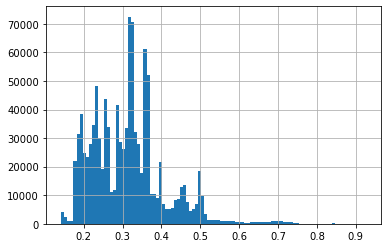

In [10]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.2877381292183095

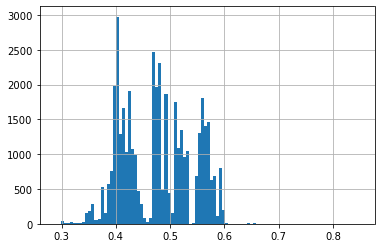

In [7]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].min()

<AxesSubplot:>

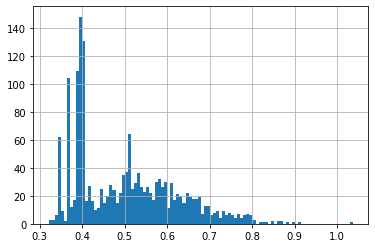

In [8]:

normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)